In [11]:
import sys
sys.path.append("/users/munozr/mycodes")
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead

 read time file


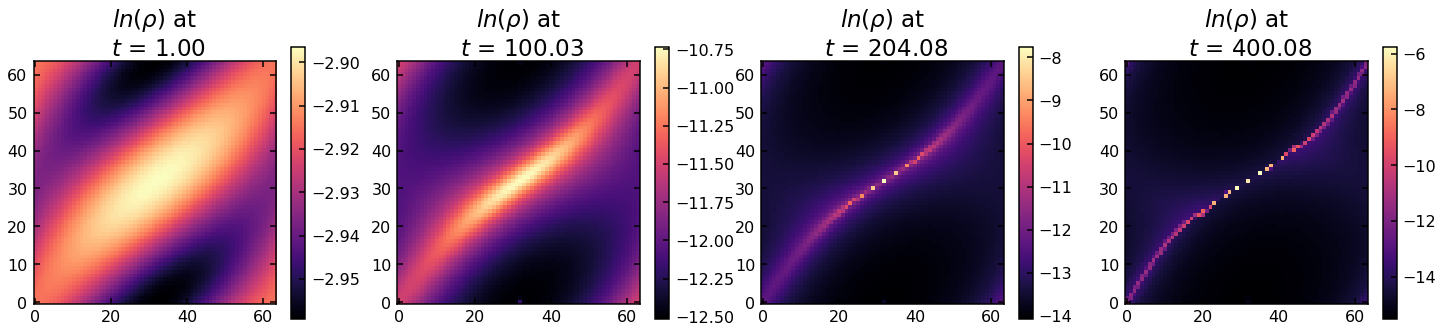

In [51]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_GRH_spin_CPunc_MR')
Lin = LinData.LinData_Class(param)
rho_today = Lin.evo.rho(Lin.evo.t_func_z(0))
f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')

plt.figure(figsize=(25,5))
i = 1
parsec = 3.0857e16 # m
Mpc = parsec*1e6 # m
G = 6.67428e-11 # m^3 kg^-1 s^-2
c = 299792458 # m s^-1
Msun = 1.98892e30 #kg

for h5it in [0, 434, 890, 1749]:
    it = int(f['it'][h5it])
    fh5 = h5py.File('{}_it_{:06d}.hdf5'.format(param['h5datapath'] + param['simname'], it), 'r') 
    rho = RRead.fixij(fh5['HYDROBASE::{} it={} tl=0 rl=0'.format('rho', it)])
    
    data = np.log(rho)
    icent = int(param['Nx']/2)
    plt.subplot(140+i)
    plt.imshow(data[:,:,icent])
    plt.colorbar()
    plt.title(r'$ln(\rho)$'+' at \n '+r'$t$ = ' + '{:.2f}'.format(f['t'][h5it]))
    i+=1

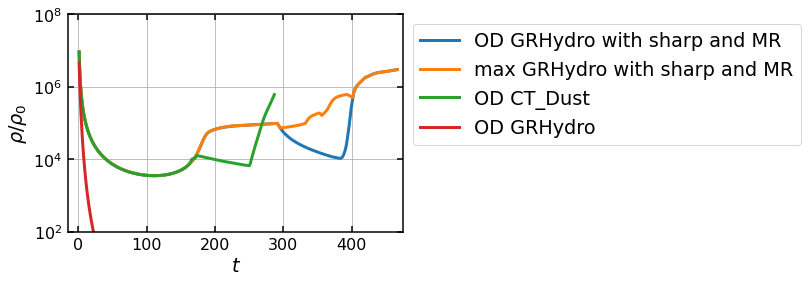

In [52]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_GRH_spin_CPunc_MR')
f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
plt.semilogy(f['t'], f['rho_OD']/rho_today, label='OD GRHydro with sharp and MR')
plt.semilogy(f['t'], f['rho_max']/rho_today, label='max GRHydro with sharp and MR')

param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_spin_CosmoPuncture')
f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
plt.semilogy(f['t'], f['rho_OD']/rho_today, label='OD CT_Dust')

param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_GRH_spin_CosmoPuncture')
f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
plt.semilogy(f['t'], f['rho_OD']/rho_today, label='OD GRHydro')

plt.ylim(1e2, 1e8)
plt.xlim(-15, 475)
#plt.xlim(-1, 35)
plt.xlabel(r'$t$')
plt.ylabel(r'$\rho/\rho_0$')
plt.grid()
plt.legend(bbox_to_anchor=(1,1))

In [55]:
param = RRead.read_parameters('pflrw_d3e2_L1206_t1_N64_EdS_GRH_spin_CPunc_MR')
f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')
for h5it in [0, 434, 890, 1749]:
    print('t = ',f['t'][h5it],', it = ',f['it'][h5it])

t =  1.0 , it =  0.0
t =  100.027887554843 , it =  86800.0
t =  204.075621944264 , it =  178000.0
t =  400.077823348896 , it =  349800.0


In [ ]:
len(